----
# Plot Oligodendrocyte Gene Signatures in Tumor Cells
----

We want to show which cell types are most similar to Tumour cells across patients

/cluster/projects/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/MatureOligodendrocytes

In [1]:
library(pheatmap)
library(ggplot2)
library(gridExtra)
library(ggpubr)

In [2]:
setwd("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/MatureOligodendrocytes")

---
## 1.0 Plot oligodendrocyte gene sigs in tumour cells
---

In [4]:
meta <- readRDS("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/AstrocyteScoring/GSC_Tumours/Astrocyte_AUCell_meta_GSC_T.rds")
colnames(meta) <- gsub("Population", "AstrocytePopulation", colnames(meta))
head(meta)

,nGene,nUMI,orig.ident,percent.mito,S.Score,G2M.Score,Phase,CC.Difference,Zhong_NPCs_upreg_AUC,Zhong_Excitatory_neurons_upreg_AUC,⋯,Lin_NatNeurosci_2017_AstrocytePopulationD_AUC,Lin_NatNeurosci_2017_AstrocytePopulationE_AUC,Morel_JNeurosci_2017_CortexAstrocytes_AUC,Morel_JNeurosci_2017_HippocampusAstrocytes_AUC,Morel_JNeurosci_2017_NaccRegionAstrocytes_AUC,Morel_JNeurosci_2017_CpuRegionAstrocytes_AUC,Morel_JNeurosci_2017_ThalamusAstrocytes_AUC,Morel_JNeurosci_2017_HypothalamusAstrocytes_AUC,Chai_Neuron_2017_AdultHippocampalAstrocytes_AUC,Chai_Neuron_2017_AdultStriatumAstrocytes_AUC
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BTSC_BT127_L_AAACCTGCACGGACAA,640,875,BTSC,0.043428571,0.0957859,0.07303696,S,0.022748941,0.10663091,0.000000000,⋯,0.06105958,0.07507290,0.009066071,0.00000000,0,0.00000000,0.00000000,0,0.05691161,0.06021974
BTSC_BT127_L_AAACCTGCATCCGGGT,1036,2408,BTSC,0.002076412,0.0535880,0.30872825,G2M,-0.255140251,0.19311215,0.095520701,⋯,0.06406926,0.12230042,0.000000000,0.13607461,0,0.05402877,0.00000000,0,0.04203807,0.03468961
BTSC_BT127_L_AAACCTGGTACAGTTC,3240,10058,BTSC,0.078047326,0.2119064,-0.22082262,S,0.432729024,0.10956094,0.007489049,⋯,0.09777365,0.11890197,0.000000000,0.08760774,0,0.00000000,0.00000000,0,0.03354806,0.05416663
BTSC_BT127_L_AAACCTGTCTACGAGT,3337,10798,BTSC,0.061863308,-0.1322671,-0.20464285,G1,0.072375715,0.07132768,0.000000000,⋯,0.06800660,0.12129185,0.000000000,0.01031511,0,0.01958835,0.00000000,0,0.03333430,0.06407349
BTSC_BT127_L_AAACGGGAGTGGTAAT,4140,14601,BTSC,0.081501267,0.4082643,0.40187978,S,0.006384479,0.25821914,0.007630352,⋯,0.05124717,0.09712995,0.000000000,0.17069380,0,0.04362063,0.00000000,0,0.03858105,0.05392528
BTSC_BT127_L_AAACGGGCAGGACGTA,543,820,BTSC,0.108536585,-0.1085568,-0.14419756,G1,0.035640733,0.04803011,0.000000000,⋯,0.06792414,0.06715780,0.000000000,0.00000000,0,0.00000000,0.07699901,0,0.04619077,0.07626926


In [13]:
### subset to only tumour cells
tumour <- meta[meta$orig.ident == "GBM", ]
colnames(tumour) <- gsub("Population", "AstrocytePopulation", colnames(tumour))
tumour <- tumour[ ,grep("_AUC", colnames(tumour))]
colnames(tumour) <- gsub("_AUC", "", colnames(tumour))
dim(tumour)

### save data
saveRDS(tumour, file = "TumourCells_AUCell_GeneSignatures.rds")

[1] 14207   241

In [28]:
subset <- c(colnames(tumour)[grep("dendro", colnames(tumour))],
            colnames(tumour)[grep("OPC", colnames(tumour))],
            colnames(tumour)[grep("OL", colnames(tumour))],
            colnames(tumour)[grep("OL", colnames(tumour))],
            colnames(tumour)[grep("MOG", colnames(tumour))]
           )
subset <- tumour[ , subset]
dim(subset)

[1] 14207    16

In [37]:
### split barcodes for PatientID
### plot 2x8 grid of signatures as violing plots / sample
x <- strsplit(rownames(subset), "_")
patient <- sapply( x, "[", 2 )
patient <- strsplit(patient, "-")
patient <- sapply(patient, "[", 1 )

subset$sample <- paste0(patient, "_T")


In [54]:
p_list <- list()

for (i in 1:(ncol(subset) - 1)){
    
    sig <- colnames(subset)[i]
    
    p_list[[i]] <- ggplot(subset, aes_string(x="sample", y=sig)) + 
  geom_violin() + geom_boxplot(width=0.1, outlier.shape = NA) + 
  ylab("AUCell Score") + theme_classic() + ggtitle(sig) + xlab("")
    
}

---
## 2.0 Violin plots of oligodendrocyte genes
---

In [3]:
meta <- readRDS("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/MatureOligodendrocytes/OligodendrocyteMarkers_TumoursAllCells.rds")

In [14]:
meta$CellType <- gsub("NormalBrain", "Oligodendrocytes", meta$CellType)

In [17]:
#####

meta$SampleCellType <- ifelse(meta$CellType == "Tumour", 
       print(paste0(meta$PatientID, "_T Tumour Cells")),
       print(paste(meta$CellType))
      )

    [1] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
    [4] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
    [7] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
   [10] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
   [13] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
   [16] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
   [19] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
   [22] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
   [25] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
   [28] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
   [31] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
   [34] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"
   [37] "G1003_T Tumour Cells" "G1003_T Tumour Cells" "G1003_T Tumour Cells"

In [18]:
table(meta$SampleCellType)


G1003_T Tumour Cells  G620_T Tumour Cells  G910_T Tumour Cells 
                7200                  585                 1290 
 G945_T Tumour Cells  G946_T Tumour Cells  G967_T Tumour Cells 
                3830                  281                   83 
 G983_T Tumour Cells               Immune     Oligodendrocytes 
                 938                26730                 3775 

In [35]:
mog <- ggplot(meta, aes(x=SampleCellType, y=MOG, fill = SampleCellType)) + 
       geom_violin() + theme_classic() + coord_flip() + ggtitle("MOG") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12))+
      stat_summary(fun.y=median, geom="point", size=2, color="black")

mag <- ggplot(meta, aes(x=SampleCellType, y=MAG, fill = SampleCellType)) + 
       geom_violin() + theme_classic() + coord_flip() + ggtitle("MAG") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12))+
      stat_summary(fun.y=median, geom="point", size=2, color="black")

maf <- ggplot(meta, aes(x=SampleCellType, y=MAF, fill = SampleCellType)) + 
       geom_violin() + theme_classic() + coord_flip() + ggtitle("MAF") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12))+
      stat_summary(fun.y=median, geom="point", size=2, color="black")

olig2 <- ggplot(meta, aes(x=SampleCellType, y=OLIG2, fill = SampleCellType)) + 
       geom_violin() + theme_classic() + coord_flip() + ggtitle("OLIG2") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) +
      stat_summary(fun.y=median, geom="point", size=2, color="black")

gfap <- ggplot(meta, aes(x=SampleCellType, y=GFAP, fill = SampleCellType)) + 
       geom_violin() + theme_classic() + coord_flip() + ggtitle("GFAP") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) +
      stat_summary(fun.y=median, geom="point", size=2, color="black")

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


In [36]:
pdf("MOG.MAG.MAF_violins_tumours.pdf", width = 20, height = 9)
ggarrange(mog, mag, maf, olig2, gfap, ncol = 3, nrow = 2)
dev.off()

pdf 
  2

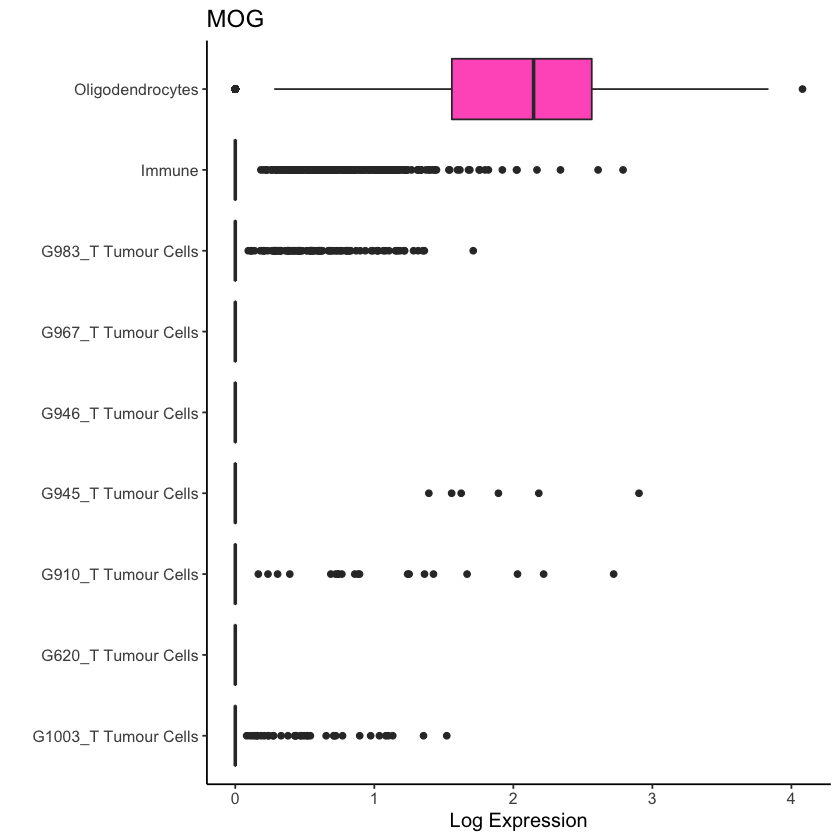

In [38]:
mog <- ggplot(meta, aes(x=SampleCellType, y=MOG, fill = SampleCellType)) + 
       geom_boxplot() + theme_classic() + coord_flip() + ggtitle("MOG") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12))
mog

In [47]:
mog <- ggplot(meta, aes(x=SampleCellType, y=MOG, color = SampleCellType)) + 
       geom_jitter(position=position_jitter(0.2), cex=0.8, alpha = 0.6) + theme_classic() + coord_flip() + ggtitle("MOG") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) +
       stat_summary(fun.y=median, geom="point", shape=18,
                 size=3, color="black")

mag <- ggplot(meta, aes(x=SampleCellType, y=MAG, color = SampleCellType)) + 
       geom_jitter(position=position_jitter(0.2), cex=0.8, alpha = 0.6) + theme_classic() + coord_flip() + ggtitle("MAG") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) +
       stat_summary(fun.y=median, geom="point", shape=18,
                 size=3, color="black")

maf <- ggplot(meta, aes(x=SampleCellType, y=MAF, color = SampleCellType)) + 
       geom_jitter(position=position_jitter(0.2), cex=0.8, alpha = 0.6) + theme_classic() + coord_flip() + ggtitle("MAF") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) +
       stat_summary(fun.y=median, geom="point", shape=18,
                 size=3, color="black")

olig2 <- ggplot(meta, aes(x=SampleCellType, y=OLIG2, color = SampleCellType)) + 
       geom_jitter(position=position_jitter(0.2), cex=0.8, alpha = 0.6) + theme_classic() + coord_flip() + ggtitle("OLIG2") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) +
       stat_summary(fun.y=median, geom="point", shape=18,
                 size=3, color="black")

gfap <- ggplot(meta, aes(x=SampleCellType, y=GFAP, color = SampleCellType)) + 
       geom_jitter(position=position_jitter(0.2), cex=0.8, alpha = 0.6) + theme_classic() + coord_flip() + ggtitle("GFAP") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) +
       stat_summary(fun.y=median, geom="point", shape=18,
                 size=3, color="black")

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


In [48]:
pdf("MOG.MAG.MAF_strip_tumours.pdf", width = 20, height = 9)
ggarrange(mog, mag, maf, olig2, gfap, ncol = 3, nrow = 2)
dev.off()

pdf 
  2

In [52]:
mog <- ggplot(meta, aes(x=SampleCellType, y=MOG, fill = SampleCellType)) + 
       geom_boxplot(alpha=0.5) + theme_classic() + coord_flip() + ggtitle("MOG") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) 

mag <- ggplot(meta, aes(x=SampleCellType, y=MAG, fill = SampleCellType)) + 
       geom_boxplot(alpha=0.5) + theme_classic() + coord_flip() + ggtitle("MAG") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) 

maf <- ggplot(meta, aes(x=SampleCellType, y=MAF, fill = SampleCellType)) + 
       geom_boxplot(alpha=0.5) + theme_classic() + coord_flip() + ggtitle("MAF") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12))

olig2 <- ggplot(meta, aes(x=SampleCellType, y=OLIG2, fill = SampleCellType)) + 
       geom_boxplot(alpha=0.5) + theme_classic() + coord_flip() + ggtitle("OLIG2") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) 

gfap <- ggplot(meta, aes(x=SampleCellType, y=GFAP, fill = SampleCellType)) + 
       geom_boxplot(alpha=0.5) + theme_classic() + coord_flip() + ggtitle("GFAP") +
       ylab("Log Expression") + xlab("") + theme(legend.position = "none", text=element_text(size=12)) 

pdf("MOG.MAG.MAF_boxplot_tumours.pdf", width = 20, height = 9)
ggarrange(mog, mag, maf, olig2, gfap, ncol = 3, nrow = 2)
dev.off()

pdf 
  2